Prathamesh Ingale

# Linear Kernels in SVM

## Aim:

Implentation of classification of data using Linear Kernels in support vector machine.

## Theory:

### Support Vector Machine

Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. 

SVM works by finding an optimal hyperplane in a high-dimensional feature space that separates the data points of different classes with the maximum margin. The hyperplane is chosen such that it maximizes the distance (margin) between the nearest data points of different classes, known as support vectors.

The algorithm uses a kernel function to map the input data into a higher-dimensional space, where it becomes easier to find a hyperplane that can linearly separate the classes. Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid.

In addition to linear separation, SVM can also handle non-linear decision boundaries by using the kernel trick. The kernel trick allows SVM to implicitly map the data points into a higher-dimensional space without explicitly computing the transformation, saving computational resources.

During the training phase, SVM optimizes a cost function that aims to find the hyperplane with the maximum margin while minimizing the classification errors. This optimization problem is typically solved using convex optimization techniques.

Once the SVM model is trained, it can be used to predict the class labels of new, unseen data points by determining which side of the hyperplane they fall on. The decision boundary is based on a threshold value, and the predicted class is determined by comparing the signed distance of the data point to the hyperplane.

### Linear Kernel

The linear kernel is the simplest kernel function. It is given by the inner product <x,y> plus an optional constant c. The linear kernel is not linear in the primal space but in the feature space (see Mercer's theorem) and can separate data that is not linearly separable in the original space.

Prathamesh Ingale

In [2]:
import numpy as prathamesh_np
import pandas as prathamesh_pd
import matplotlib.pyplot as prathamesh_plt
import seaborn as prathamesh_sns
%matplotlib inline

In [3]:
prathamesh_df = prathamesh_pd.read_csv('pulsar_data_train.csv')
prathamesh_df=prathamesh_df.dropna()
prathamesh_df.isnull().sum()
prathamesh_df.head()


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0


In [4]:
x = prathamesh_df.iloc[:, 2:4]
y = prathamesh_df.iloc[:, -1]

In [5]:
from sklearn.model_selection import train_test_split as prathamesh_train_test_split
x_train, x_test, y_train, y_test = prathamesh_train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train, x_test, y_train, y_test
cols = x_train.columns

In [6]:
from sklearn.preprocessing import StandardScaler as prathamesh_StandardScaler

prathamesh_scaler = prathamesh_StandardScaler()
x_train = prathamesh_scaler.fit_transform(x_train)
x_test = prathamesh_scaler.transform(x_test)

In [7]:
from sklearn.svm import SVC as prathamesh_SVC
prathamesh_SVC = prathamesh_SVC
prathamesh_classifier = prathamesh_SVC(kernel="linear", random_state=0)
prathamesh_classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [8]:
y_pred = prathamesh_classifier.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [9]:
from sklearn.metrics import confusion_matrix as prathamesh_confusion_matrix
prathamesh_confusion_matrix = prathamesh_confusion_matrix
cm = prathamesh_confusion_matrix(y_test,y_pred)
cm

array([[1676,    8],
       [  46,  125]], dtype=int64)

C:\Users\paxyi\AppData\Local\Temp\ipykernel_23888\1945036893.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)


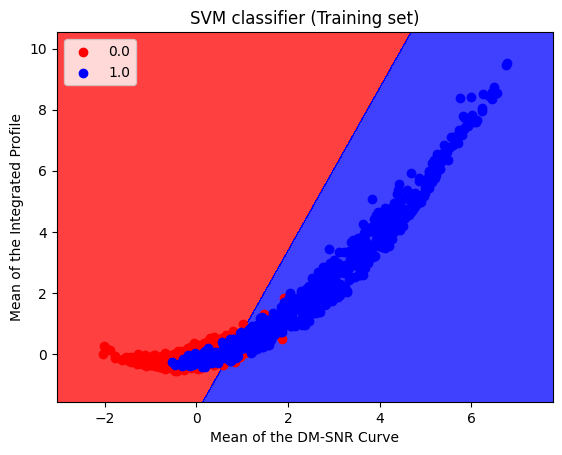

In [10]:
#train
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = prathamesh_np.meshgrid(
    prathamesh_np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01), 
    prathamesh_np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01)
)
prathamesh_plt.contourf(x1, x2, 
             prathamesh_classifier.predict(prathamesh_np.array([x1.ravel(), x2.ravel()]).T
                                ).reshape(x1.shape), 
             alpha = 0.75, 
             cmap = ListedColormap(('red', 'blue')))
prathamesh_plt.xlim(x1.min(), x1.max())
prathamesh_plt.ylim(x2.min(), x2.max())
for i, j in enumerate(prathamesh_np.unique(y_set)):
    prathamesh_plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)

prathamesh_plt.title('SVM classifier (Training set)')
prathamesh_plt.xlabel('Mean of the DM-SNR Curve')
prathamesh_plt.ylabel('Mean of the Integrated Profile')
prathamesh_plt.legend()
prathamesh_plt.show()

C:\Users\paxyi\AppData\Local\Temp\ipykernel_23888\582383339.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


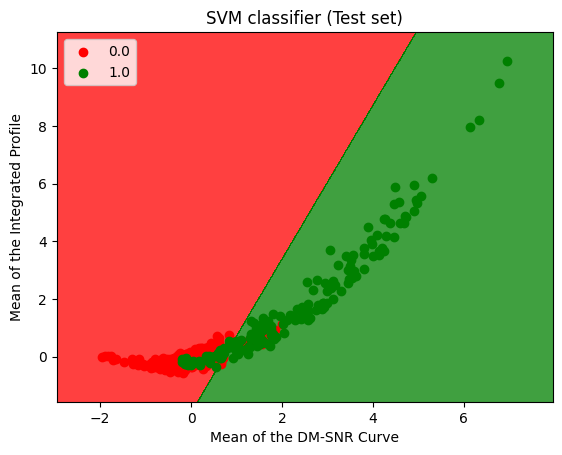

In [11]:
#test
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = prathamesh_np.meshgrid(prathamesh_np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step =0.01),
prathamesh_np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
prathamesh_plt.contourf(x1, x2, prathamesh_classifier.predict(prathamesh_np.array([x1.ravel(),
x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'green')))
prathamesh_plt.xlim(x1.min(), x1.max())
prathamesh_plt.ylim(x2.min(), x2.max())
for i, j in enumerate(prathamesh_np.unique(y_set)):
    prathamesh_plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

prathamesh_plt.title('SVM classifier (Test set)')
prathamesh_plt.xlabel('Mean of the DM-SNR Curve')
prathamesh_plt.ylabel('Mean of the Integrated Profile')
prathamesh_plt.legend()
prathamesh_plt.show()